In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency, spearmanr

In [2]:
df = pd.read_csv('Data/Credit_Scoring.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [3]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 1. Giữa độ tuổi (age) và thu nhập trung bình theo tháng (MonthlyIncome) có tương quan với nhau hay không?

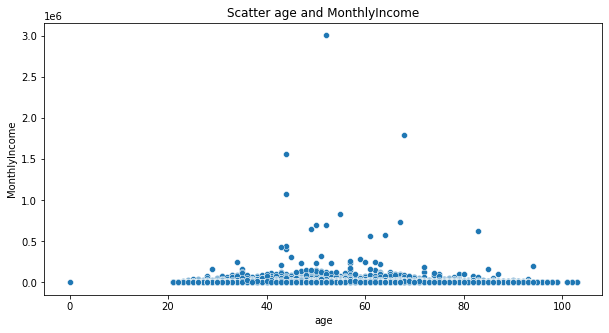

In [4]:
plt.rcParams['figure.figsize'] = (10,5)
sns.scatterplot(x = df['age'], y = df['MonthlyIncome'])
plt.title('Scatter age and MonthlyIncome')
plt.show()

In [5]:
df1 = df.dropna(subset = ['age','MonthlyIncome'])

In [6]:
r, pvalue = pearsonr(df1['age'], df1['MonthlyIncome'])
print(f'Hệ số tương quan Pearson: {r}' )
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: 0.037721515434702424
p-value: 3.964657234287844e-39


### Kết luận : pvalue < 0.05, r nhỏ
- Bác bỏ H0
- Với độ tin cậy 95% thì giữa age và MonthlyIncome có mối quan hệ tuyến tính yếu

## 2. Giữa số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) và độ tuổi có tương quan với nhau không

In [7]:
df2 = df.dropna(subset = ['age','NumberOfOpenCreditLinesAndLoans'])

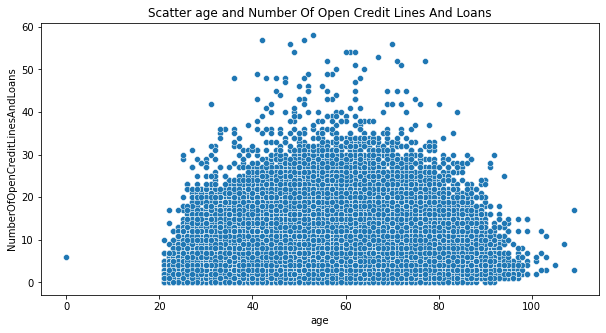

In [8]:
sns.scatterplot(y = df2['NumberOfOpenCreditLinesAndLoans'], x = df2['age'])
plt.title('Scatter age and Number Of Open Credit Lines And Loans')
plt.show()

In [9]:
r, pvalue = pearsonr(df2['age'], df2['NumberOfOpenCreditLinesAndLoans'])
print(f'Hệ số tương quan Pearson: {r}' )
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: 0.14770413180125888
p-value: 0.0


### Kết luận : pvalue < 0.05
- Bác bỏ H0
- Vậy với độ tin cậy 95% thì giữa `NumberOfOpenCreditLinesAndLoans` với `Age` có quan hệ tuyến tính yếu

## 3. Giữa (số lượng người phụ thuộc) NumberOfDependents và thu nhập theo tháng (MonthlyIncome) có tương quan với nhau hay không


In [10]:
df3 = df.dropna(subset = ['NumberOfDependents','MonthlyIncome'])

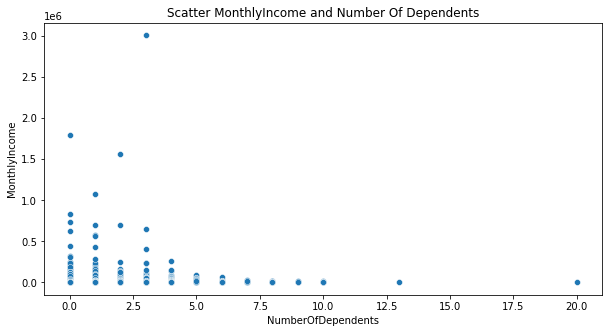

In [11]:
sns.scatterplot(y = df3['MonthlyIncome'], x = df3['NumberOfDependents'])
plt.title('Scatter MonthlyIncome and Number Of Dependents')
plt.show()

In [12]:
r, pvalue = pearsonr(df3['MonthlyIncome'], df3['NumberOfDependents'])
print(f'Hệ số tương quan Pearson: {r}' )
print(f'p-value: {pvalue}')

Hệ số tương quan Pearson: 0.06267144549170632
p-value: 6.211808987902723e-105


### Kết luận : pvalue < 0.05
- Bác bỏ H0
- Vậy với độ tin cậy 95% thì giữa `MonthlyIncome` với `Number of Dependents` có quan hệ tuyến tính yếu

## 4. Mã hóa lại thuộc tính MonthlyIncome thành thuộc tính MonthlyIncome_order theo các khoảng tứ phân vị, giữa thuộc tính mới này và tình trạng nợ xấu trong 2 năm trở lại đây (SeriousDlqin2yrs) có liên quan tới nhau không

In [13]:
df4 = df.dropna(subset = ['MonthlyIncome', 'SeriousDlqin2yrs'])

In [15]:
q1 = df4['MonthlyIncome'].quantile(q=0.25)
q2 = df4['MonthlyIncome'].quantile(q=0.50)
q3 = df4['MonthlyIncome'].quantile(q=0.75)

list_condition = [df4['MonthlyIncome'] < q1,
                 (df4['MonthlyIncome'] >= q1) & (df4['MonthlyIncome'] < q2),
                 (df4['MonthlyIncome'] >= q2) & (df4['MonthlyIncome'] < q3),
                  df4['MonthlyIncome'] > q3]

list_choice = [1,2,3,4]
df4['MonthlyIncome_ordinal'] = np.select(condlist=list_condition,choicelist=list_choice)

/tmp/ipykernel_19380/2828202378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['MonthlyIncome_ordinal'] = np.select(condlist=list_condition,choicelist=list_choice)


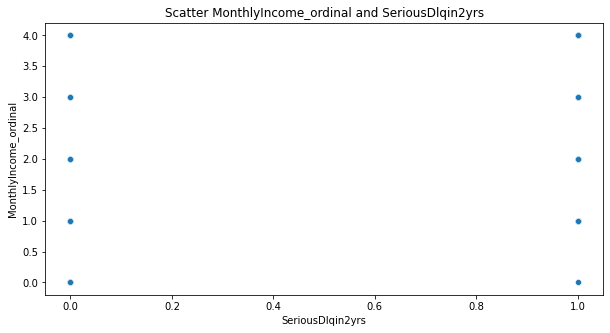

In [16]:
sns.scatterplot(y = df4['MonthlyIncome_ordinal'], x = df4['SeriousDlqin2yrs'])
plt.title('Scatter MonthlyIncome_ordinal and SeriousDlqin2yrs')
plt.show()

In [17]:
corr, pvalue = spearmanr(df4['MonthlyIncome_ordinal'], df4['SeriousDlqin2yrs'])
print(f'Hệ số tương quan Spearman: {corr}')
print(f'p-value: {pvalue}')

Hệ số tương quan Spearman: -0.06836371480899846
p-value: 1.5605465812027156e-124


### Kết luận : pvalue < 0.05
- Bác bỏ H0
- Với độ tin cậy 95% thì giữa `MonthlyIncome_oridinal` và `SeriousDlqin2yrs` có tương quan tuyến tính nghịch và yếu

## 5. Giữa thuộc tính MonthlyIncome_order với thuộc tính tỉ lệ số dư tài khoản (RevolvingUtilizationOfUnsecuredLines) có mối liên hệ với nhau không

In [18]:
df4 = df4.dropna(subset=['RevolvingUtilizationOfUnsecuredLines'])

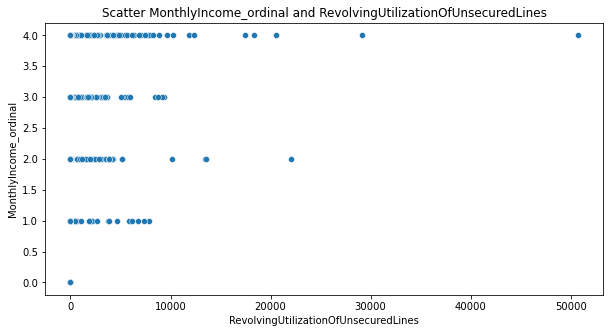

In [19]:
sns.scatterplot(y = df4['MonthlyIncome_ordinal'], x = df4['RevolvingUtilizationOfUnsecuredLines'])
plt.title('Scatter MonthlyIncome_ordinal and RevolvingUtilizationOfUnsecuredLines')
plt.show()

In [20]:
corr, pvalue = spearmanr(df4['MonthlyIncome_ordinal'], df4['RevolvingUtilizationOfUnsecuredLines'])
print(f'Hệ số tương quan Spearman: {corr}')
print(f'p-value: {pvalue}')

Hệ số tương quan Spearman: -0.07902640635827311
p-value: 7.326723735027839e-166


### Kết luận : pvalue < 0.05
- Bác bỏ H0
- Với độ tin cậy 95% thì giữa `MonthlyIncome_oridinal` và `RevolvingUtilizationOfUnsecuredLines` có tương quan tuyến tính nghịch và yếu